# Лабораторная работа

In [1]:
library(MASS)
library(ISLR)
library(car)

Загрузка требуемого пакета: carData



Посмотрим на данные Boston

In [2]:
fix(Boston)

# Простая линейная регрессия

In [3]:
# можно так
#lm.fit = lm(medv ~ lstat, data = Boston)

# или так
attach(Boston)
lm.fit = lm(medv ~ lstat)
#summary(lm.fit)

Что содержится в результате моделирования

In [4]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

Способы достучаться до оценок коэффициентов

In [5]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [6]:
lm.fit$coefficients

(Intercept)       lstat 
 34.5538409  -0.9500494

In [7]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

Доверительные интервалы оценок коэффициентов

In [8]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


Предсказание и доверительный интервал

In [9]:
predict(lm.fit, data.frame(lstat = (c(5, 10, 15))), interval = "confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


In [10]:
predict(lm.fit, data.frame(lstat = (c(5, 10, 15))), interval = "prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


Диаграмма рассеяния и предсказания полученной модели

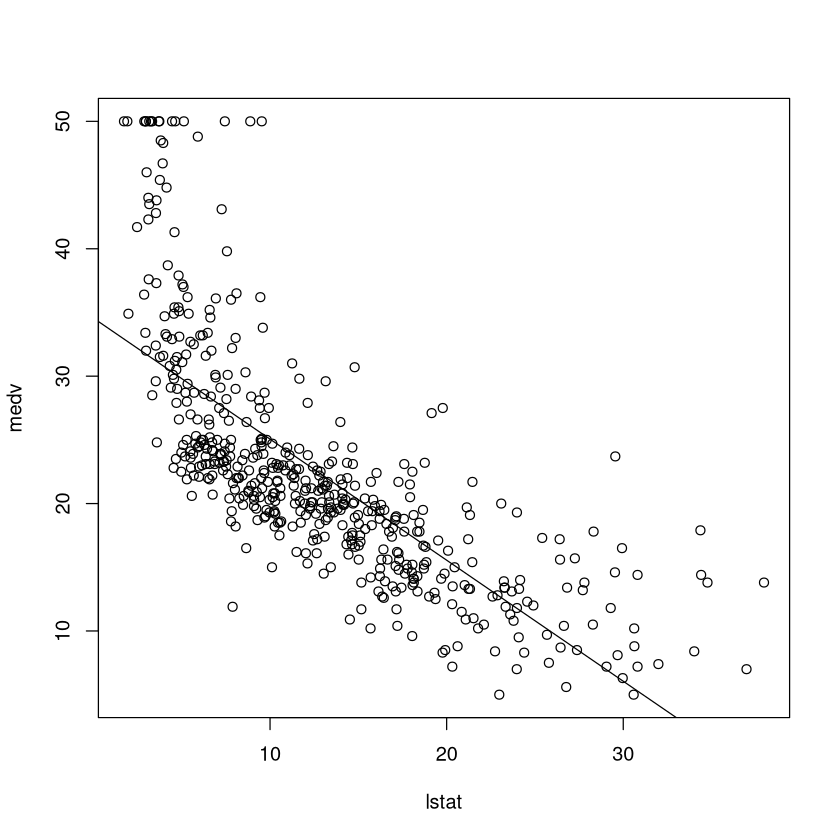

In [11]:
plot(lstat, medv)
abline(lm.fit)

Настройки для точек

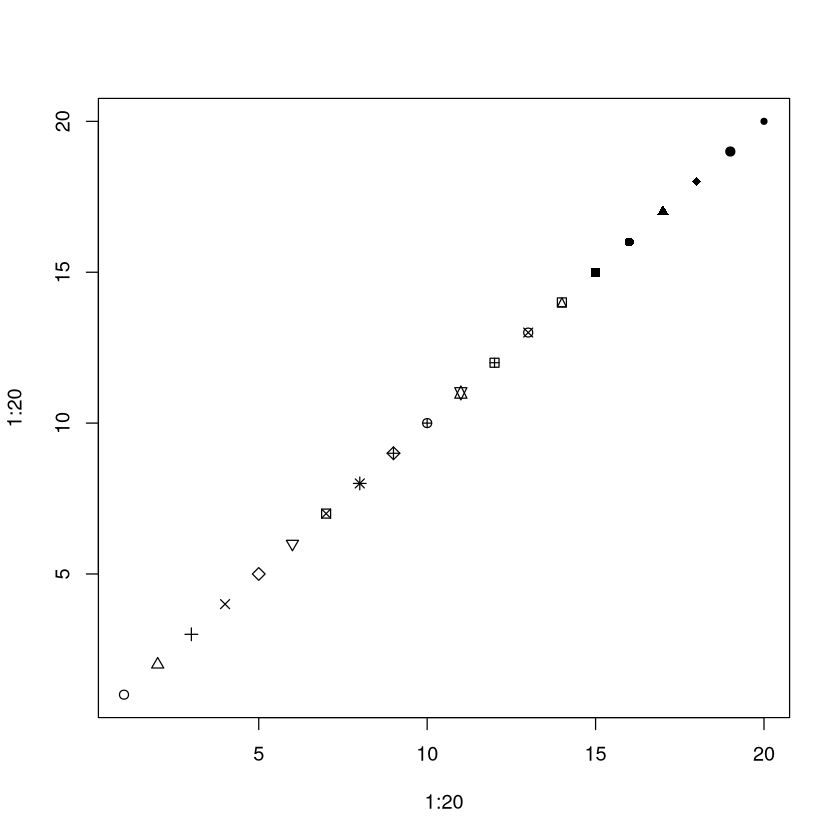

In [12]:
plot(1:20, 1:20, pch = 1:20)

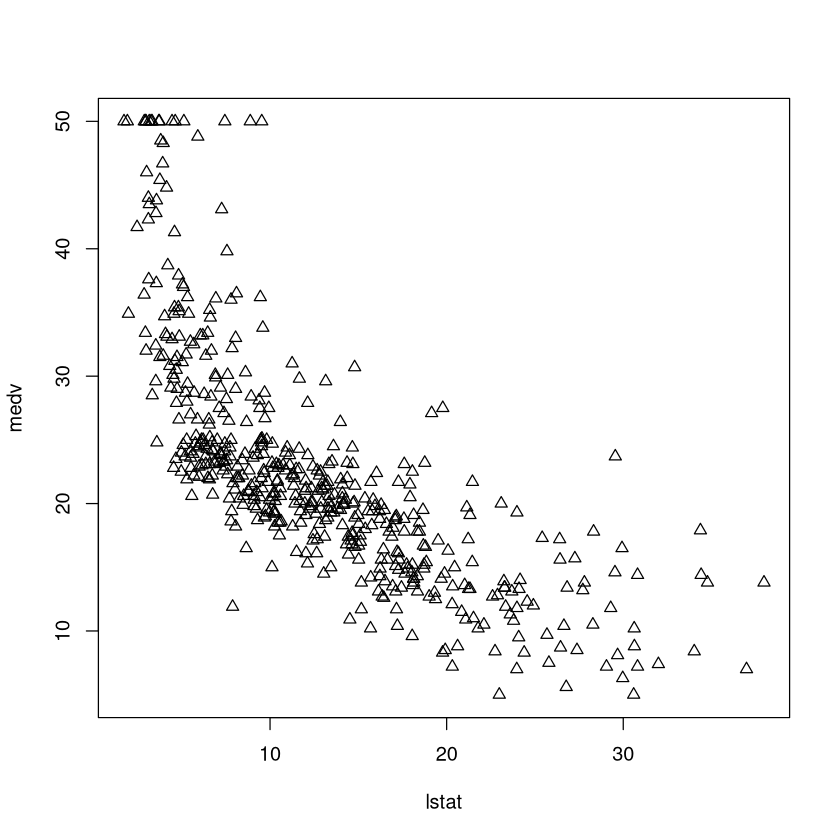

In [13]:
plot(lstat, medv, pch = 2)

Исследование остатков полученных моделей

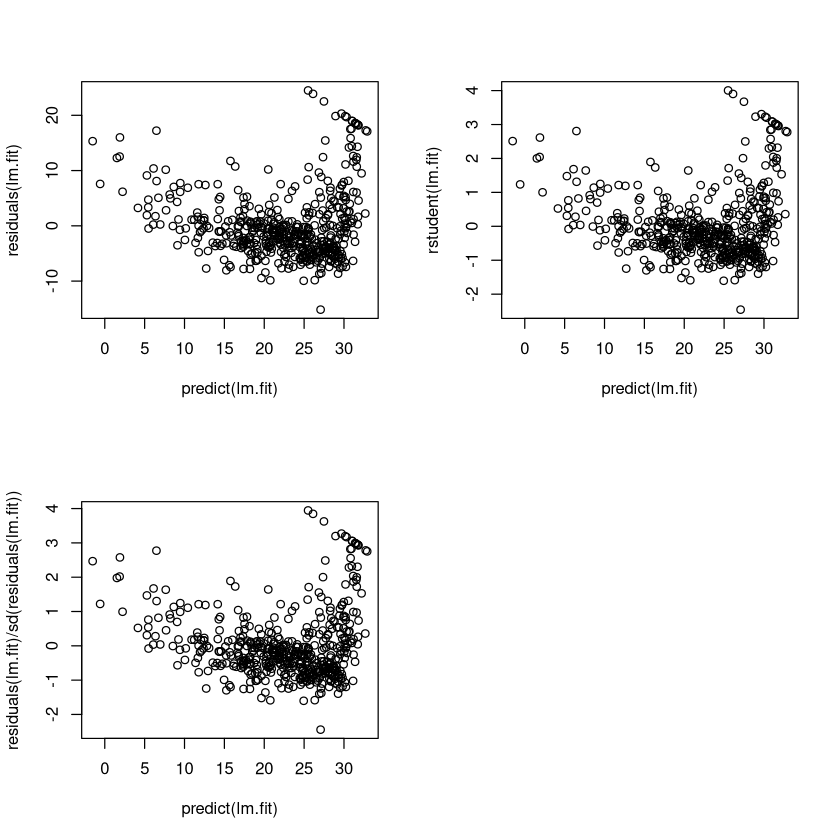

In [14]:
par(mfrow = c(2,2))

# остаки модели от предсказаний
plot(predict(lm.fit), residuals(lm.fit))
# Стьюдентизированные остатки модели от предсказаний
plot(predict(lm.fit), rstudent(lm.fit))
# Стьюдентизация это деление на стандартное отклонение модели это покзано
# удостоверимся в этом на третьем графике
plot(predict(lm.fit), residuals(lm.fit)/sd(residuals(lm.fit)))

Показатель разбалансировки

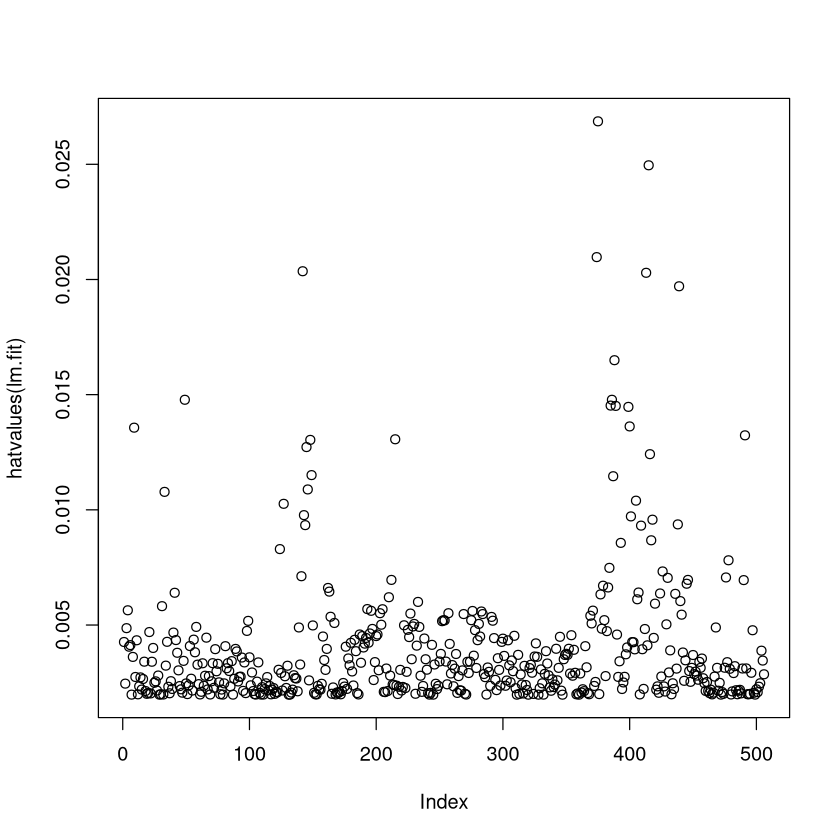

In [15]:
plot(hatvalues(lm.fit))

In [16]:
which.max(hatvalues(lm.fit))

375 
375

# Множественная регрессия

Два предиктора 

In [17]:
lm(medv ~ lstat + age)


Call:
lm(formula = medv ~ lstat + age)

Coefficients:
(Intercept)        lstat          age  
   33.22276     -1.03207      0.03454  


Все предикторы

In [18]:
lm.fit = lm(medv ~ ., data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

Описание того, что есть в объекте линейной модели

In [19]:
?summary.lm

summary.lm {stats},R Documentation
object,"an object of class ""lm"", usually, a result of a call to lm."
x,"an object of class ""summary.lm"", usually, a result of a call to summary.lm."
correlation,"logical; if TRUE, the correlation matrix of the estimated parameters is returned and printed."
digits,the number of significant digits to use when printing.
symbolic.cor,"logical. If TRUE, print the correlations in a symbolic form (see symnum) rather than as numbers."
signif.stars,"logical. If TRUE, ‘significance stars’ are printed for each coefficient."
...,further arguments passed to or from other methods.
residuals,"the weighted residuals, the usual residuals rescaled by the square root of the weights specified in the call to lm."
coefficients,"a p x 4 matrix with columns for the estimated coefficient, its standard error, t-statistic and corresponding (two-sided) p-value. Aliased coefficients are omitted."
aliased,named logical vector showing if the original coefficients are aliased.


Показатель VIF

In [20]:
vif(lm.fit)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

Модель по всем показателям, кроме одного

In [21]:
lm.fit1 = lm(medv ~. -age, data = Boston)
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

Или преобразуя страрую модель

In [22]:
summary(update(lm.fit, ~. -age))


Call:
lm(formula = medv ~ crim + zn + indus + chas + nox + rm + dis + 
    rad + tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.

# Эффекты взаимодействия

Простое взаимодействие

In [23]:
lm(medv ~ age:lstat)


Call:
lm(formula = medv ~ age:lstat)

Coefficients:
(Intercept)    age:lstat  
  30.158863    -0.007715  


Взаимодействие с включением главных эффектов

In [24]:
lm(medv ~ age + lstat + age:lstat)


Call:
lm(formula = medv ~ age + lstat + age:lstat)

Coefficients:
(Intercept)          age        lstat    age:lstat  
 36.0885359   -0.0007209   -1.3921168    0.0041560  


Или более кратко эта запись примет вид

In [25]:
lm(medv ~ age*lstat)


Call:
lm(formula = medv ~ age * lstat)

Coefficients:
(Intercept)          age        lstat    age:lstat  
 36.0885359   -0.0007209   -1.3921168    0.0041560  


# Нелинейные преобразования предикторов

`I` - позволяет использовать арифметические операторы в формулах.

In [27]:
lm.fit2 = lm(medv ~ lstat + I(lstat^2))
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


Произвести сравнение с линейной моделью

In [31]:
lm.fit = lm(medv ~ lstat)
anova(lm.fit, lm.fit2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,504,19472.38,NA,NA,NA,NA
2,503,15347.24,1,4125.138,135.1998,7.630116e-28


Визуализация квадратичной модели

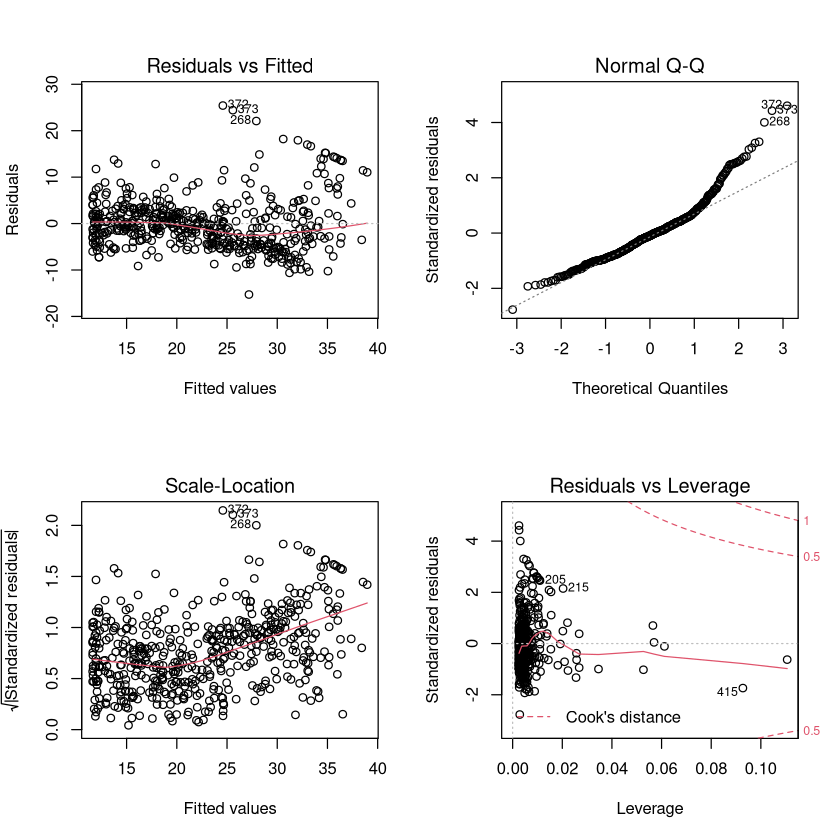

In [32]:
par(mfrow = c(2,2))
plot(lm.fit2)

Полиномы более высоких степеней удобнее строить используя функцию `poly`

In [34]:
lm.fit5 = lm(medv ~ poly(lstat, 5))
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


Пример с логарифмированием 

In [35]:
summary(lm(medv ~ log(rm)))


Call:
lm(formula = medv ~ log(rm))

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


# Качественные предикторы

In [37]:
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

Все предикторы и несколько эффектов взаимодействия

In [39]:
lm.fit = lm(Sales ~  . + Income:Advertising + Price:Age, data = Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

Далее получим способ перекодировки

In [40]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


Узнаем больше о функции `contrasts`

In [41]:
?contrasts

contrasts {stats},R Documentation
x,a factor or a logical variable.
contrasts,logical. See ‘Details’.
sparse,"logical indicating if the result should be sparse (of class dgCMatrix), using package Matrix."
how.many,How many contrasts should be made. Defaults to one less than the number of levels of x. This need not be the same as the number of columns of value.
value,"either a numeric matrix (or a sparse or dense matrix of a class extending dMatrix from package Matrix) whose columns give coefficients for contrasts in the levels of x, or the (quoted) name of a function which computes such matrices."


# Создание функций в R

In [44]:
LoadLibraries = function()
{
    print("simple function")
}

LoadLibraries()

[1] "simple function"
